# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

We will use k-Nearest Neighbors algorithm to predict car prices. First I will implement my own version of k-Nearest Neighbors and afterwards, use the scikit-learn library's version of k-Nearest Neighbors.

Since machine learning algorithms only work on numeric columns, we will remove all non-numeric columns from the dataset before analyzing it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
pd.options.display.max_columns = 99
pd.options.display.max_rows = 20

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
        'peak-rpm','city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning the Data

The `normalized-losses` columns uses '?' for null values so we will replace all '?' with `np.nan` values. Since '?' is a string value, all columns that have '?' are of type object and we need to convert them into type float.  We will also select only the columns with continuous values from the dataset [documentation](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names).

In [3]:
cv_columns = ['normalized-losses', 'wheel-base', 'length',
              'width', 'height', 'curb-weight', 'bore',
              'stroke', 'compression-rate', 'horsepower',
              'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cont_cars = cars[cv_columns].copy()
cont_cars.replace('?', np.nan, inplace=True)
cont_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cont_cars = cont_cars.astype('float')
cont_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


Since `price` is the column that we want to predict, we will remove all rows with `Nan` values for the `price` column. We will also fill all `NaN` values for all other columns with their respective mean in order to not lose any data.

In [5]:
cont_cars = cont_cars.dropna(subset=['price'])
cont_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [6]:
cont_cars = cont_cars.fillna(cont_cars.mean())
cont_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
cont_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


# Univariate k-Nearest Neighbors (Implementation)

Now that we have a clean and usable dataset, we will first implement our own version of k-Nearest Neighbors algorithm to predict car prices.

The function will take in parameters

- df: DataFrame we are working on
- factor: the column which we are predicting with
- val: the value we want to use to predict 
- k: number of neighbors we want to use to predict

In [8]:
def predict_price(df, factor, val, k):
    # Randomizing indexes of the dataframe
    df = df.loc[np.random.permutation(len(df))]
    temp_df = df.copy()
    
    # Finding nearest neighbors
    temp_df['distance'] = factor.apply(lambda x: np.abs(x - val))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_price = temp_df.iloc[0:k]['price']
    predicted_price = nearest_neighbors_price.mean()
    
    return predicted_price


# Testing function using a given highway-mpg of 29 with 5 nearest neighbors
factor = cont_cars['highway-mpg']
price = predict_price(cont_cars, factor, 29, 5)
print(f'The predicted price for a car that has a highway mpg of 29 is ${price}')

The predicted price for a car that has a highway mpg of 29 is $10362.8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


# Univariate k-Nearest Neighbors (Scikit-learn library)

We will standardize all columns so larger values between columns that have larger effects on the prediction.Then we will create a function that will
- split the data set into a training and test set.
- instantiate the KNeighborsRegressor class
- fit the model on the training set, and make predictions on the test set.
- calculate the RMSE and return that value

In [9]:
# Standardize all columns except 'price'
price_col = cont_cars['price']

cont_cars = (cont_cars - cont_cars.min()) / (cont_cars.max() - cont_cars.min())
cont_cars['price'] = price_col

cont_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [10]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1) # so output remains consistent
    
    # Randomizing order of rows in df
    shuffled = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled)
    
    # Calculating where to split df into test and train
    train_row_last = int(len(rand_df) / 2)
    
    # Selecting train and test sets
    train_df = rand_df.iloc[0:train_row_last]
    test_df = rand_df.iloc[train_row_last:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    # Fitting KNN model using k nearest neighbors
    for k in k_values:
        # Instantiating the KNeighborsRegressor class
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # Making prediction
        predicted_price = knn.predict(test_df[[train_col]])
        # Calculating mean squared error and RMSE
        mse = mean_squared_error(test_df[target_col], predicted_price)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

# For each column (except 'price', train a model and return RMSE value

rmse_results = {}

train_cols = cont_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cont_cars)
    rmse_results[col] = rmse_val
    
rmse_results

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'stroke': {1: 10925.953215320224,
  3: 11848.331671515607,

Visualizing the RMSE for each column with RMSE on the y-axis and k value on x-axis.

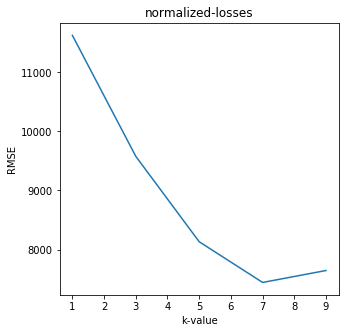

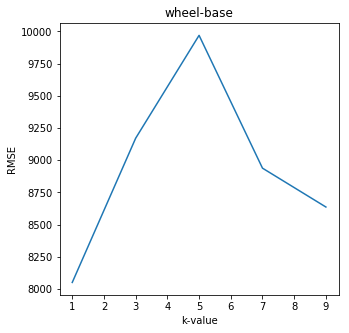

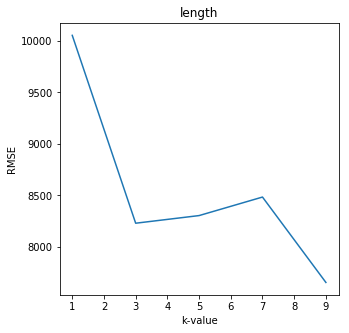

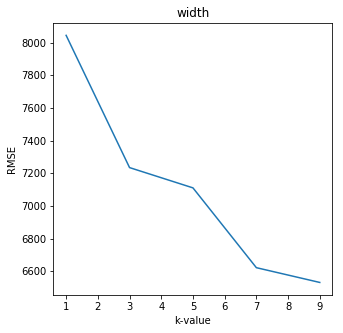

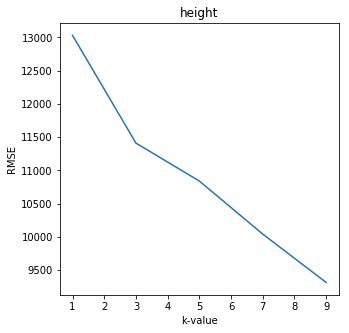

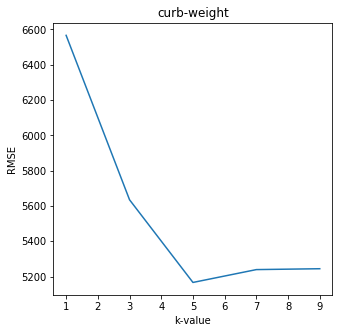

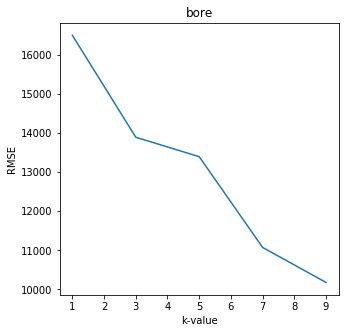

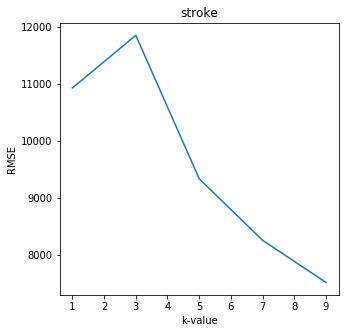

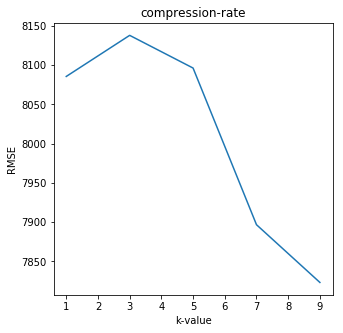

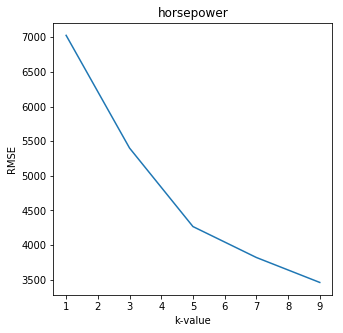

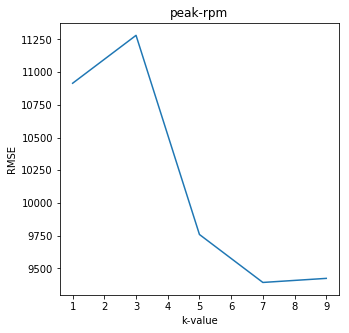

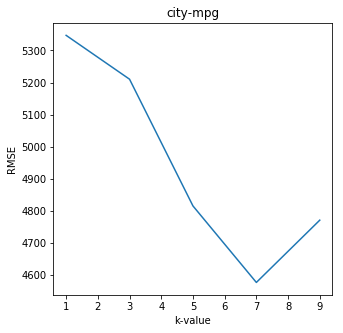

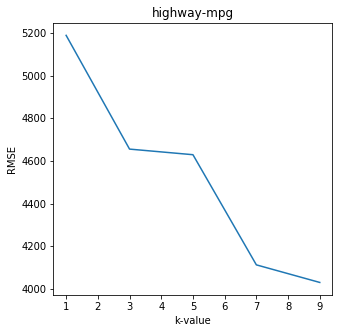

In [11]:
for k, val in rmse_results.items():
    f = plt.figure(figsize=(5,5))
    x = list(val.keys()) # k values
    y = list(val.values()) # rmse
    plt.plot(x,y, label=k)
    plt.title(label=k)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')

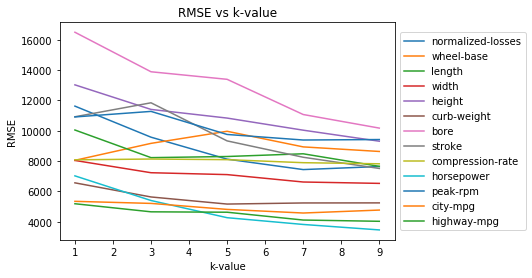

In [12]:
# Same visualization as above but all in one chart
for k, val in rmse_results.items():
    x = list(val.keys()) # k values
    y = list(val.values()) # rmse
    plt.plot(x,y, label=k)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.title('RMSE vs k-value')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [13]:
# Computing average RMSE across different 'k' values for each feature

avg_rmses = {}
for k, v in rmse_results.items():
    avg = np.mean(list(v.values()))
    avg_rmses[k] = avg

series_rmse = pd.Series(avg_rmses)
series_rmse.sort_values()

highway-mpg           4522.911624
horsepower            4795.755143
city-mpg              4943.696718
curb-weight           5570.589864
width                 7108.476258
compression-rate      8007.936956
length                8545.374123
normalized-losses     8885.006588
wheel-base            8953.712114
stroke                9576.240416
peak-rpm             10154.303501
height               10927.529704
bore                 13009.824975
dtype: float64

Based on the plots above, all factors see a decrease in RMSE values as the number of neighbors chosen (k) increases. The three best traits in predicting the price (lowest RMSE) are

- `highway_mpg`
- `horsepower`
- `city_mpg`

## Multivariate Model

Now we will create a model that takes in multiple training columns in order to predict the price. Then we will use different number of columns to see which columns together provide the best prediction for the price.

In [18]:
def multi_knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomizing row order
    shuffled = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled)
    
    train_last_row = int(len(rand_df) / 2)
    
    # Selecting train and test sets
    train_df = rand_df[0:train_last_row]
    test_df = rand_df[train_last_row:]
    
    
    # k_values which we will test lowest RMSE for
    k_values = [i for i in range(1, 15)]
    k_rmses = {}
    
    for k in k_values:
        # Fitting model
        knn= KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Making a prediction
        predicted_price = knn.predict(test_df[train_cols])
        
        # Calculating RMSE
        mse = mean_squared_error(predicted_price, test_df[target_col])
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

multi_rmse_results = {}

three_best = ['highway-mpg', 'horsepower', 'city-mpg']
rmse_val = multi_knn_train_test(three_best, 'price', cont_cars)
multi_rmse_results["three best features"] = rmse_val

four_best = ['highway-mpg', 'horsepower', 'city-mpg', 'curb-weight']
rmse_val = multi_knn_train_test(four_best, 'price', cont_cars)
multi_rmse_results["four best features"] = rmse_val

five_best = ['highway-mpg', 'horsepower', 'city-mpg', 'curb-weight', 'width']
rmse_val = multi_knn_train_test(five_best, 'price', cont_cars)
multi_rmse_results["five best features"] = rmse_val

multi_rmse_results

{'three best features': {1: 3954.189402606199,
  2: 3999.8683310631095,
  3: 4144.457443315101,
  4: 3926.2456232776535,
  5: 3836.2190466475436,
  6: 3607.656472846688,
  7: 3628.4741443039106,
  8: 3610.491165123439,
  9: 3547.8812454571416,
  10: 3308.574061988543,
  11: 3155.8393769557706,
  12: 3319.1278227646467,
  13: 3507.8615115404286,
  14: 3604.158331713047},
 'four best features': {1: 5237.432714187703,
  2: 4609.5798145635445,
  3: 4433.881736844774,
  4: 3969.977665114742,
  5: 3998.051352475315,
  6: 3932.941556116539,
  7: 3971.5641265164704,
  8: 3954.5418134939514,
  9: 3934.277634110402,
  10: 3825.9897852880777,
  11: 3665.8869297444094,
  12: 3686.359958384494,
  13: 3687.536605036815,
  14: 3687.621495154233},
 'five best features': {1: 5712.185386617727,
  2: 4792.052462356834,
  3: 4403.56389045211,
  4: 4441.196820524689,
  5: 4479.405697497412,
  6: 4349.304746040152,
  7: 4256.4479576288995,
  8: 4126.4673691099515,
  9: 4062.9688418149026,
  10: 3914.8465261

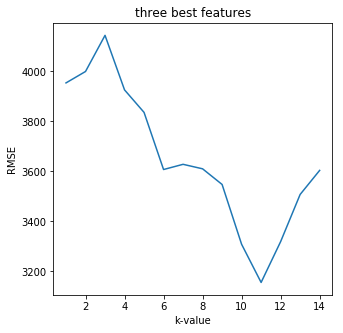

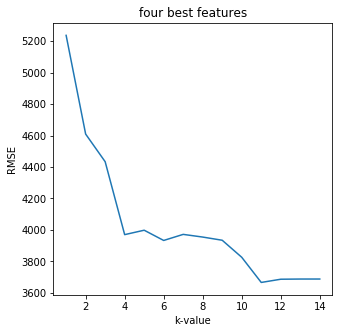

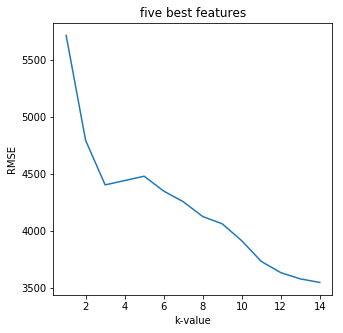

In [19]:
for k, val in multi_rmse_results.items():
    f = plt.figure(figsize=(5,5))
    x = list(val.keys()) # k values
    y = list(val.values()) # rmse
    plt.plot(x,y, label=k)
    plt.title(label=k)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')

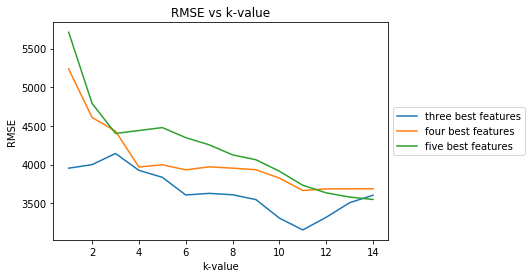

In [20]:
# Same visualization as above but all in one chart
for k, val in multi_rmse_results.items():
    x = list(val.keys()) # k values
    y = list(val.values()) # rmse
    plt.plot(x,y, label=k)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.title('RMSE vs k-value')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [21]:
# Computing average RMSE across different 'k' values for each multi-feature

avg_rmses = {}
for k, v in rmse_results.items():
    avg = np.mean(list(v.values()))
    avg_rmses[k] = avg

series_rmse = pd.Series(avg_rmses)
series_rmse.sort_values()

three best features    3653.645999
four best features     4042.545942
five best features     4216.977981
dtype: float64

Based on the RMSE values above, using features `highway-mpg`, `horsepower`, and `city-mpg` is the best way to predict car prices using k-Nearest Neighbors method. When we used just a single feature, the lowest average RMSE we calculated was 4522.91 whereas the lowest with using multiple features was 3653.65. 